In [81]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root_folder: Path = Path().resolve()
print(root_folder)

C:\Users\dar58\OneDrive\Documents\GitHub\docking_simulation_helpers


# Directions to run this analysis Jupyter Notebook:

1. **Place all of your `.txt` results files from your DeepGlycanSite run in a folder.**
    - For example, there is a folder titled `janique_run`.
    
2. **In Cell 6, there is a dictionary instance titled `files`.**
    - On the left, before the colon, place the name of the ligand.
    - On the right of the colon, write the path to the corresponding file.

3. **To run the specific residues in Cell 9,** update the `significant_residues` variable with a list of the residues you want to graph. 
    - Also, update the `residue_labels` with the associated x-axis labels you want to include for each residue.

4. **To return all values above a threshold in Cell 10,** update the `threshold` variable to your desired cutoff.
    - This will include all residues where at least **one ligand** had a binding probability above the threshold.

---

Make sure the files and paths are correctly set, and you should be good to go!



In [67]:
def create_residue_graph(
    data: pd.DataFrame, 
    residue_labels: list,
    significant_residues: list,
    x_col: str = "Residue Number",
    y_col: str = "Binding Probability",
    hue_col: str = "Ligands",
    base_palette: str = "crest",
    figsize: tuple = (10, 6)
) -> None:
    """
    Creates a bar plot for binding probabilities by residue number.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot.
        residue_labels (list): List of labels for the x-axis.
        significant_residues (list): List of significant residues to filter the data.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue.
        palette (list): List of colors for the hue.
        figsize (tuple): Size of the figure.
    """
    data_filtered = data[data[x_col].isin(significant_residues)]
    unique_ligands = data_filtered[hue_col].unique()
    n_colors = len(unique_ligands)
    palette = sns.color_palette(base_palette, n_colors)


    plt.figure(figsize=figsize)
    residue_graph = sns.barplot(
        data=data_filtered,
        x=x_col,
        y=y_col,
        hue=hue_col,
        palette=palette
    )

    residue_graph.set_xlabel("Residue Number")
    residue_graph.set_ylabel("Binding Probability")
    residue_graph.set_xticklabels(residue_labels, rotation=45)

    plt.show()

In [68]:
def return_binding_probabilities(
        file_path: Path, 
        ligand_name: str,
) -> pd.DataFrame:
    """
    Reads binding probabilities from a file and returns them as a list.

    Parameters:
        file_path (Path): Path to the file containing binding probabilities.
        df (pd.DataFrame): DataFrame containing the data to plot.

    Returns:
        tuple: A tuple containing a list of binding probabilities and a list of residue numbers.
    """
    
    probabilities = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            num = line.split("[")[1]
            num = num.split("]")[0]
            num = float(num)

            probabilities.append(num)

        num_residues = [i for i in range(1, len(probabilities) + 1)]
        ligand_column = [ligand_name] * len(probabilities)


    new_data = pd.DataFrame({
        "Residue Number": num_residues,
        "Binding Probability": probabilities,
        "Ligands": ligand_column
    })

    return new_data


In [ ]:
def filter_residues_by_binding_threshold(
    df: pd.DataFrame,
    threshold: float = 0.3,
    residue_col: str = "Residue Number",
    binding_col: str = "Binding Probability",
) -> pd.DataFrame:
    residues_above_threshold = (
        df.groupby(residue_col)[binding_col]
        .max()
        .reset_index()
    )

    significant_residues = residues_above_threshold[
        residues_above_threshold[binding_col] >= threshold
    ][residue_col].to_list()

    return df[df[residue_col].isin(significant_residues)]

In [69]:
files = {
    "cbmca": Path("janique_run/example.txt"),
    "gd2": Path("janique_run/cbm3-gd2.txt")
}

In [70]:
dfs = [
    return_binding_probabilities(
        file_path=file_path, 
        ligand_name=ligand_name
    ) 
    for ligand_name, file_path in files.items()
]

combined_df = pd.concat(dfs, ignore_index=True)

print(f"Rows: {combined_df.shape[0]}")
print(f"Columns: {combined_df.shape[1]}")
print(combined_df.head())
print(combined_df.tail())

Rows: 274
Columns: 3
   Residue Number  Binding Probability Ligands
0               1               0.3460   cbmca
1               2               0.1553   cbmca
2               3               0.0442   cbmca
3               4               0.1263   cbmca
4               5               0.1444   cbmca
     Residue Number  Binding Probability Ligands
269             133               0.0443     gd2
270             134               0.0762     gd2
271             135               0.0505     gd2
272             136               0.3028     gd2
273             137               0.0819     gd2


C:\Users\dar58\AppData\Local\Temp\ipykernel_10476\2603015835.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  residue_graph.set_xticklabels(residue_labels, rotation=45)


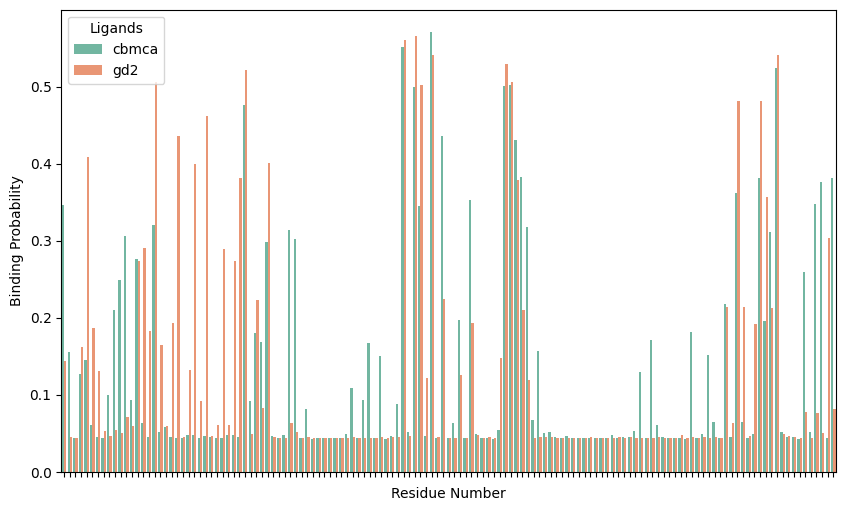

In [ ]:
"""
Gather an overview of what this data looks like for every single residue. 
"""

all_residue_numbers = combined_df["Residue Number"].to_list()
all_residue_labels = [None for r in all_residue_numbers]

create_residue_graph(
    data=combined_df,
    residue_labels=all_residue_labels,
    significant_residues=all_residue_numbers,
    base_palette="Set2",
)

C:\Users\dar58\AppData\Local\Temp\ipykernel_10476\2603015835.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  residue_graph.set_xticklabels(residue_labels, rotation=45)


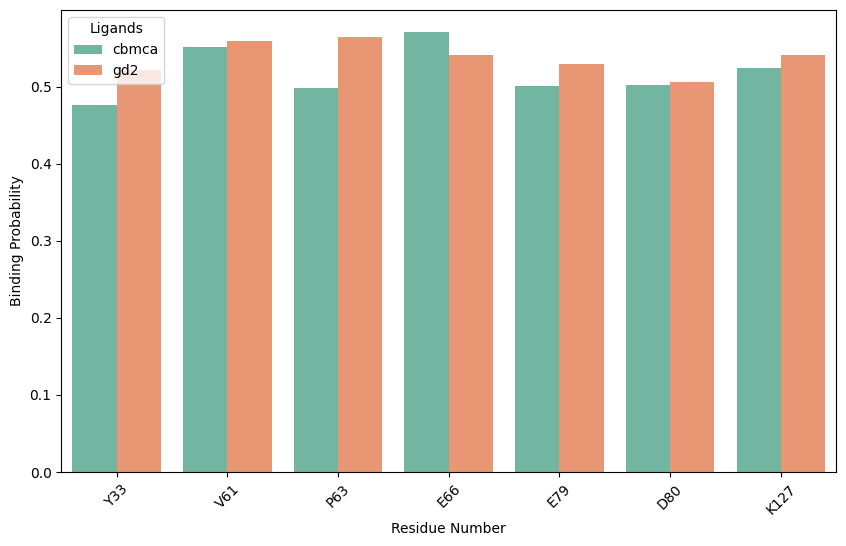

In [ ]:
"""
Name the residues of interest manually and create a graph.
"""

significant_residues = [33, 61, 63, 66, 79, 80, 127]
residue_labels = ["Y33", "V61", "P63", "E66", "E79", "D80", "K127"]

create_residue_graph(
    data=combined_df,
    residue_labels=residue_labels,
    significant_residues=significant_residues,
    x_col="Residue Number",
    y_col="Binding Probability",
    hue_col="Ligands",
    base_palette="Set2",
    figsize=(10, 6)
)

C:\Users\dar58\AppData\Local\Temp\ipykernel_10476\2603015835.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  residue_graph.set_xticklabels(residue_labels, rotation=45)


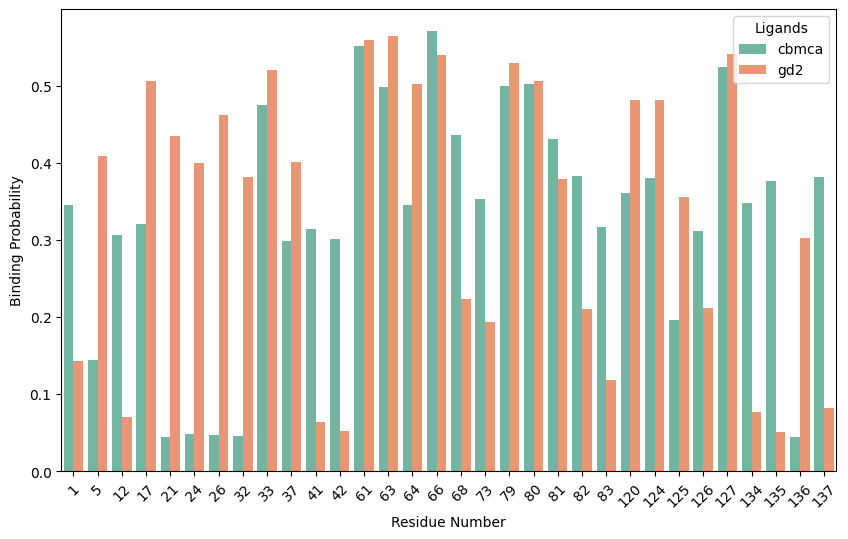

In [ ]:
"""
Return the binding probabilities for the residues that are above a certain threshold.
This is done by filtering the data frame.
"""

threshold_value = 0.3

filtered_df = filter_residues_by_binding_threshold(
    df=combined_df,
    threshold=threshold_value,
    residue_col="Residue Number",
    binding_col="Binding Probability"
)

residue_labels = [
    str(r) for r 
    in filtered_df["Residue Number"].unique()
]

create_residue_graph(
    data=filtered_df,
    residue_labels=residue_labels,
    significant_residues=sorted(filtered_df["Residue Number"].unique()),
    base_palette="Set2"
)